# Links


Link do vídeo explicativo: https://youtu.be/7rFsu48oBn8

API BCB: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88

Fonte de dados: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

# Importando Bibliotecas

In [ ]:
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

# Obtendo Dados através da API do Banco Central do Brasil

In [ ]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

# Exemplo de Consultas à API do Banco Central do Brasil

In [ ]:
ipca = consulta_bc(433)

In [ ]:
igpm = consulta_bc(189)

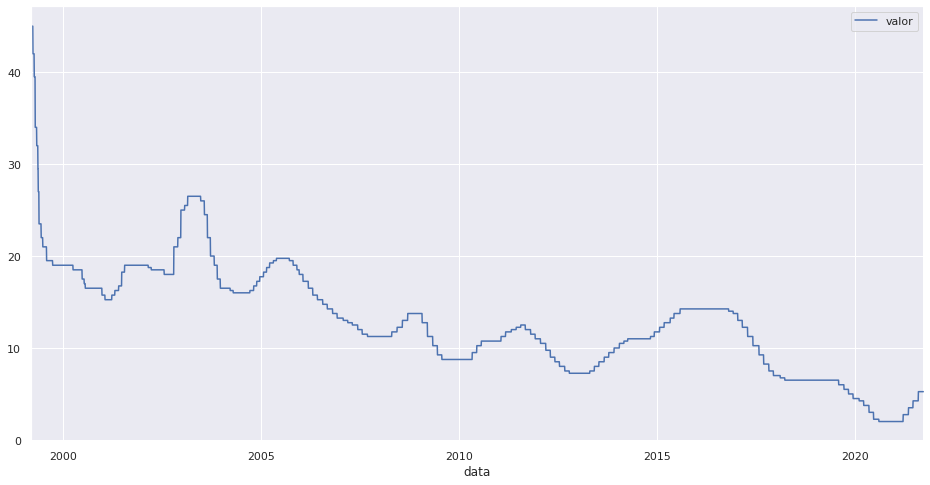

In [ ]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [ ]:
reservas_internacionais = consulta_bc(13621)

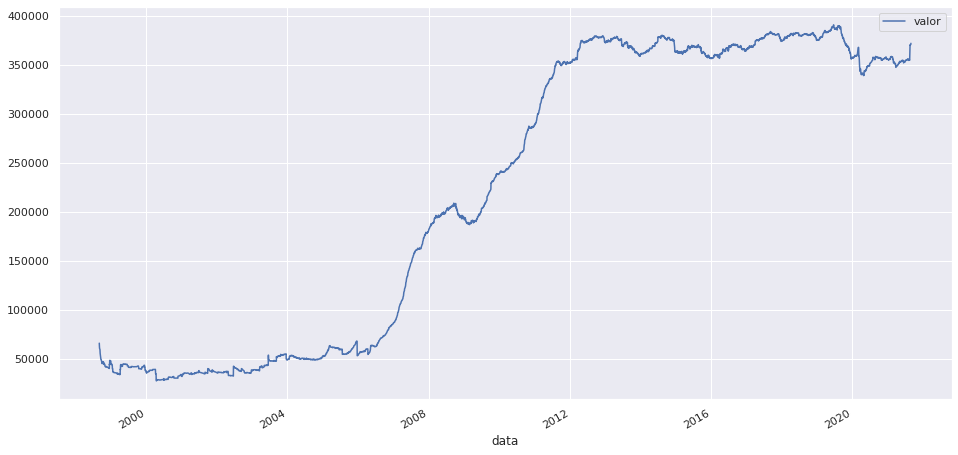

In [ ]:
reservas_internacionais.plot()

In [ ]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2021-02-01,14.4
2021-03-01,14.7
2021-04-01,14.7


# CDI vs IBOV

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3 MB 5.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=09634867e686f583fbcacb8efcc87b498935500235476ba1ce8a3f3e055fc862
  Stored in directory: /tmp/pip-ephem-wheel-cache-lj0n0yyc/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov_retorno = ibov.pct_change()

In [ ]:
cdi = consulta_bc(12)

In [ ]:
data_inicio = '2018-01-01'

In [ ]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [ ]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

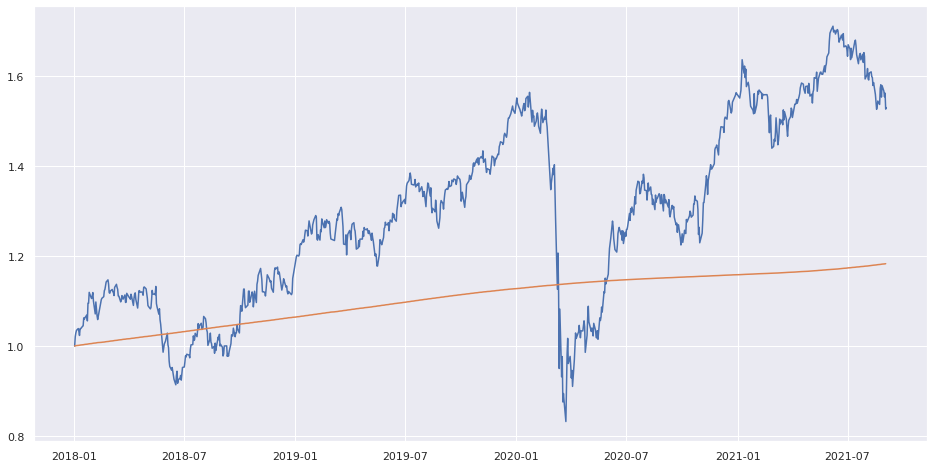

In [ ]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);